# Choropleth Maps in Plotly

Author: **Marcin Sikorski**<br/>
Date: November, 2021

A choropleth map is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income ([Wikipedia][1]). It's a popular, readable and appealing way for visualizing geospatial data.

This simple repository aims to practice data visualizing with choropleths. We will use for this task <code>plotly</code> which is a great, open-source, easy graphing library and allows to create interactive charts. Choropleth polygons will be based on GeoJSON files - an open standard format designed for representing simple geographical features along with their non-spatial attributes.

[1]: https://en.wikipedia.org/wiki/Choropleth_map 'Wikipedia'

### Choropleth 1 - Unemployment Rate per Voivodeship

First choropleth will represent unemployment rate for August 2021. The data source is from this website - [Money][1] [Accessed 27th October 2021], which as the website says was originated from GUS (Główny Urząd Statystyczny).

[1]: https://www.money.pl/gospodarka/stopa-bezrobocia-przestala-spadac-gus-podliczyl-dane-za-sierpien-6686223144180704a.html 'Money'

In [1]:
# importing modules
import pandas as pd
import plotly.express as px

In [2]:
# geojson with voivodeships
url = r'https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/wojewodztwa/wojewodztwa-medium.geojson'

In [3]:
# loading geojson data
from urllib.request import urlopen
import json

with urlopen(url) as response:
    wojewodztwa = json.load(response)

# display properties for first element
wojewodztwa['features'][0]['properties']

{'id': 1, 'nazwa': 'śląskie'}

In [4]:
# loading pandas data
df_w = pd.read_csv('data_2021.txt', sep=',')

df_w.head()

,wojewodztwo,stopa
0,dolnośląskie,5.2
1,podkarpackie,8.4
2,lubuskie,5.4
3,śląskie,6.3
4,opolskie,4.6


In [5]:
# number of rows (voivodeships) in data frame - there should be 16 for Poland
print(len(df_w['wojewodztwo']))

# are lengths equal?
print(len(wojewodztwa['features']) == len(df_w['wojewodztwo']))

16
True


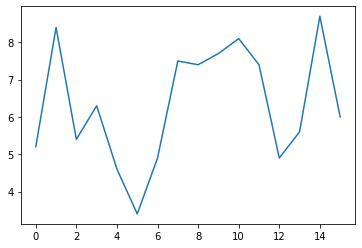

In [6]:
# overall plot on unemployment rate
df_w['stopa'].plot()

In [7]:
# extracting voivodeship names and their id's from geojson
wojew_id_map = {}

for feature in wojewodztwa['features']:
    feature['id'] = feature['properties']['id']
    wojew_id_map[feature['properties']['nazwa']] = feature['id']
    
wojew_id_map

{'śląskie': 1,
 'opolskie': 2,
 'wielkopolskie': 3,
 'zachodniopomorskie': 4,
 'świętokrzyskie': 5,
 'kujawsko-pomorskie': 6,
 'podlaskie': 7,
 'dolnośląskie': 8,
 'podkarpackie': 9,
 'małopolskie': 10,
 'pomorskie': 11,
 'warmińsko-mazurskie': 12,
 'łódzkie': 13,
 'mazowieckie': 14,
 'lubelskie': 15,
 'lubuskie': 16}

In [8]:
# create new id in data frame by matching with id from geojson
df_w['id'] = df_w['wojewodztwo'].apply(lambda x: wojew_id_map[x])

df_w.head()

,wojewodztwo,stopa,id
0,dolnośląskie,5.2,8
1,podkarpackie,8.4,9
2,lubuskie,5.4,16
3,śląskie,6.3,1
4,opolskie,4.6,2


In [9]:
# basic choropleth
fig_w = px.choropleth(data_frame=df_w,
                      geojson=wojewodztwa,
                      locations=df_w['id'],
                      color=df_w['stopa'],
                      color_continuous_scale='thermal',
                      hover_name=df_w['wojewodztwo'],
                      labels={'stopa': '[%]'},
                      height=700,
                      range_color=(0,10),
                      title='Unemployment Rate in August 2021')

# adding labels
fig_w.add_scattergeo(geojson=wojewodztwa,
                     locations=df_w['id'],
                     text=df_w['stopa'],
                     mode='text',
                     textfont={'size': 18, 'family': 'Arial'})

fig_w.update_geos(fitbounds='locations', visible=False, scope='europe')

# disable zooming and remove floating menu
config = {'scrollZoom': False, 'displayModeBar': False}

import plotly
# save to html file
plotly.offline.plot(fig_w, filename='figure_unemployment.html', config=config)

'figure_unemployment.html'

### Choropleth 2 - COVID-19 Cases per Voivodeship

Second choropleth will represent spread of COVID-19 in October 2021 per voivodeship. This dataset is provided by GUS and is updated daily. The data was downloaded from GUS's official website [GUS][1] [Accessed 1st November].

[1]: https://www.gov.pl/web/koronawirus/wykaz-zarazen-koronawirusem-sars-cov-2 'GUS'

In [10]:
import glob

# path to directory with multiple csv files
path = r'C:\Python\notebooks_jupyter\choropleths\danewojewodztwa'
all_files = glob.glob(path + '\*.csv')

list = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0, sep=';', encoding='cp1250')
    list.append(frame)

# concatenate to data frame
df_p = pd.concat(list, axis=0, ignore_index=True)

df_p.head()

,wojewodztwo,liczba_przypadkow,liczba_na_10_tys_mieszkancow,zgony,zgony_w_wyniku_covid_bez_chorob_wspolistniejacych,zgony_w_wyniku_covid_i_chorob_wspolistniejacych,liczba_zlecen_poz,liczba_ozdrowiencow,liczba_osob_objetych_kwarantanna,liczba_wykonanych_testow,liczba_testow_z_wynikiem_pozytywnym,liczba_testow_z_wynikiem_negatywnym,liczba_pozostalych_testow,teryt,stan_rekordu_na
0,Cały kraj,1344,0.35,23,4,19,5499,994,89515,42312,1525,40680,107,t00,2021-10-01
1,dolnośląskie,68,0.23,0,0,0,304,60,6094,2670,78,2587,5,t02,2021-10-01
2,kujawsko-pomorskie,63,0.30,2,0,2,280,76,2466,1956,70,1876,10,t04,2021-10-01
3,lubelskie,254,1.21,5,0,5,730,135,9412,2846,279,2554,13,t06,2021-10-01
4,lubuskie,15,0.15,0,0,0,124,14,2221,909,17,890,2,t08,2021-10-01


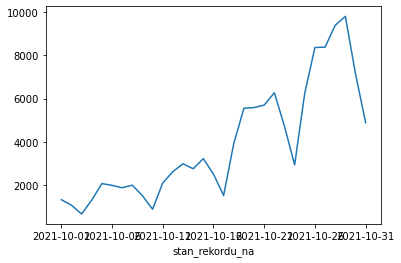

In [11]:
# new data frame
df_new = df_p[df_p['wojewodztwo'] == 'Cały kraj'].set_index('stan_rekordu_na')

# daily cases for whole country
df_new['liczba_przypadkow'].plot()

In [12]:
# drop records
df_p = df_p[df_p['wojewodztwo'] != 'Cały kraj']

# select 1,2 and last column
df_p = df_p.iloc[:, [0,1,-1]]

# overall information of data frame
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 1 to 526
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   wojewodztwo        496 non-null    object
 1   liczba_przypadkow  496 non-null    int64 
 2   stan_rekordu_na    496 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.6+ KB


In [13]:
# check number of unique voivodeships in data frame per day
df_p.groupby(by='stan_rekordu_na')['wojewodztwo'].nunique()

# optional method using a pivot table
#df_p.pivot_table(index='stan_rekordu_na', aggfunc=lambda x: len(x.unique()))

stan_rekordu_na
2021-10-01    16
2021-10-02    16
2021-10-03    16
2021-10-04    16
2021-10-05    16
2021-10-06    16
2021-10-07    16
2021-10-08    16
2021-10-09    16
2021-10-10    16
2021-10-11    16
2021-10-12    16
2021-10-13    16
2021-10-14    16
2021-10-15    16
2021-10-16    16
2021-10-17    16
2021-10-18    16
2021-10-19    16
2021-10-20    16
2021-10-21    16
2021-10-22    16
2021-10-23    16
2021-10-24    16
2021-10-25    16
2021-10-26    16
2021-10-27    16
2021-10-28    16
2021-10-29    16
2021-10-30    16
2021-10-31    16
Name: wojewodztwo, dtype: int64

In [14]:
# create new id in data frame by matching with id from geojson
df_p['id'] = df_p['wojewodztwo'].apply(lambda x: wojew_id_map[x])

df_p.head()

,wojewodztwo,liczba_przypadkow,stan_rekordu_na,id
1,dolnośląskie,68,2021-10-01,8
2,kujawsko-pomorskie,63,2021-10-01,6
3,lubelskie,254,2021-10-01,15
4,lubuskie,15,2021-10-01,16
5,łódzkie,59,2021-10-01,13


In [15]:
fig_covid = px.choropleth(data_frame=df_p,
                          geojson=wojewodztwa,
                          locations=df_p['id'],
                          color=df_p['liczba_przypadkow'],
                          color_continuous_scale='Sunset',
                          hover_name=df_p['wojewodztwo'],
                          labels={'liczba_przypadkow': 'Cases', 'stan_rekordu_na': 'Date'},
                          height=700,
                          title='New Cases of COVID-19 per Day in October 2021',
                          animation_frame=df_p['stan_rekordu_na'])

fig_covid.update_geos(fitbounds='locations', visible=False, scope='europe')

# disable zooming and remove floating menu
config = {'scrollZoom': False, 'displayModeBar': False}

# save to html file
plotly.offline.plot(fig_covid, filename='figure_covid.html', config=config)

'figure_covid.html'

### Choropleth 3 - Population Distribution in Powiats

Last choropleth will represent population density in Polish powiats in year 2013. The concept of creating this chart is the same as previous. Unlike the previous charts, this one will need more data processing due to bigger number of polygons (powiats). We will also use <code>Mapbox</code> - a mapping platform for custom designed maps.

Data sources [Accessed 27th October 2021]:<br>
https://zpe.gov.pl/a/rozmieszczenie-ludnosci-polski/DQ9OTgf37<br>
https://static.zpe.gov.pl/portal/f/res/R4RyNQv9sF7eC/4/1AjOpiYeZdgfDYu2l5NlhyE7CY6d1QEB/Geog_gim_2_15_4_Gest_zalud_Powiaty.ods

In [16]:
# geojson with powiats
url_p = r'https://raw.githubusercontent.com/ppatrzyk/polska-geojson/master/powiaty/powiaty-medium.geojson'

# loading geojson data from url
with urlopen(url_p) as response:
    pow_url = json.load(response)

# check properties for any element
pow_url['features'][3]['properties']

{'id': 4, 'nazwa': 'powiat radomski'}

In [17]:
# number of features (powiaty) in geojson - there should be 380 for Poland
n = len(pow_url['features'])
n

380

In [18]:
# get list of powiats
powiats = []

for i in range(0,n):
    powiats.append(pow_url['features'][i]['properties']['nazwa'])

# display first 10 elements
powiats[0:10]

['powiat ropczycko-sędziszowski',
 'powiat łosicki',
 'powiat piaseczyński',
 'powiat radomski',
 'powiat sierpecki',
 'powiat szydłowiecki',
 'powiat węgrowski',
 'powiat gostyniński',
 'powiat grodziski',
 'powiat łukowski']

In [19]:
# number of unique values
b = len(set(powiats))

# difference between list length and unique values
print(n - b)

# return duplicates from list of powiats
print(set([x for x in powiats if powiats.count(x) > 1]))

10
{'powiat bielski', 'powiat opolski', 'powiat świdnicki', 'powiat krośnieński', 'powiat średzki', 'powiat grodziski', 'powiat ostrowski', 'powiat brzeski', 'powiat nowodworski', 'powiat tomaszowski'}


Unfortunately, not all names of powiats are unique in Poland which means we will not be able to match their id's correctly with data frame rows by names. There would be 10 missing powiats on future choropleth. Both the data frame and GeoJSON file will need a new unique feature (for example TERYT) to map all powiats.
Since the number of duplicates in not large I downloaded the GeoJSON file from URL location and changed the names manually based on the point coordinates searched on Google Maps and it's voivodeship. Let's load the corrected file from directory.

In [20]:
# loading geojson file from directory
powiaty = json.load(open('powiaty.geojson', encoding='UTF-8'))

# check properties for any element
powiaty['features'][34]['properties']

{'id': 35, 'nazwa': 'powiat mrągowski'}

In [21]:
# loading pandas data
df = pd.read_excel('data_2013.xlsx', header=0, sheet_name='Sheet1')

# adding new column with population density
df['density'] = df['population']/df['area']

# scaling data in new column with log10 - this will improve presentation
from numpy import log10
df['density'] = log10(df['density'])

df.head()

,powiat,area,population,density
0,bolesławiecki,1304,90420,1.840987
1,dzierżoniowski,479,105284,2.342027
2,głogowski,443,90386,2.309697
3,górowski,738,36625,1.695721
4,jaworski,582,52356,1.954043


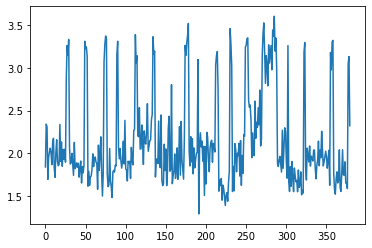

In [22]:
# overall plot on population density
df['density'].plot()

In [23]:
# unique values of powiat names in data frame
print(len(df['powiat'].unique()))

# are lengths equal?
print(len(powiaty['features']) == len(df['powiat']))

380
True


We need to remove "powiat " substring from names in GeoJSON. Otherwise we won't match id's with data frame records. Optionally, we can add this phrase to <code>powiat</code> column in the data frame but it is better to reduce memory usage.

In [24]:
# trim/remove substring 'powiat ' from powiat name
for i in range(0,n):
    if 'nazwa' in powiaty['features'][i]['properties']:
        powiaty['features'][i]['properties']['nazwa'] =\
        powiaty['features'][i]['properties']['nazwa'].replace('powiat ', '')

# check any name from geojson
powiaty['features'][120]['properties']['nazwa']

'garwoliński'

In [25]:
# extracting powiat names and their id's from geojson
pow_id_map = {}

for feature in powiaty['features']:
    feature['id'] = feature['properties']['id']
    pow_id_map[feature['properties']['nazwa']] = feature['id']

# check first 10 elements
import itertools
dict(itertools.islice(pow_id_map.items(), 10)) 

{'ropczycko-sędziszowski': 1,
 'łosicki': 2,
 'piaseczyński': 3,
 'radomski': 4,
 'sierpecki': 5,
 'szydłowiecki': 6,
 'węgrowski': 7,
 'gostyniński': 8,
 'grodziski (mazowiecki)': 9,
 'łukowski': 10}

In [26]:
# create new id column in data frame by matching with id from geojson
df['id'] = df['powiat'].apply(lambda x: pow_id_map[x])

df.head()

,powiat,area,population,density,id
0,bolesławiecki,1304,90420,1.840987,150
1,dzierżoniowski,479,105284,2.342027,187
2,głogowski,443,90386,2.309697,36
3,górowski,738,36625,1.695721,313
4,jaworski,582,52356,1.954043,378


In [27]:
# mapbox choropleth
fig_pow = px.choropleth_mapbox(data_frame=df,
                               geojson=powiaty,
                               locations=df['id'],
                               color=df['density'],
                               color_continuous_scale='YlOrRd',
                               range_color=(0,5),
                               mapbox_style='carto-positron',
                               hover_name=df['powiat'],
                               height=900,
                               center={'lat': 52, 'lon': 20},
                               opacity=.4,
                               zoom=5,
                               labels={'density': '[density scale]'},
                               title='Population Density in Poland in 2013')

fig_pow.update_geos(fitbounds='locations', visible=True)

# hide colorbar
fig_pow.update_layout(coloraxis_showscale=False)

# save to html file
plotly.offline.plot(fig_pow, filename='figure_density.html')

'figure_density.html'

The choropleth maps due to their size and interactive functions were exported to an HTML file. They can be opened in any web browser and are available in this repository (in ZIP file).

### Conclusions

This notebook represented how to efficiently plot choropleth maps with Python on different cases. These figures were made in <code>plotly</code> library which allows us to easily build outline and interactive choropleths. We successfully composed three different thematic maps:
* static, noninteractive choropleth of unemployment rates, 
* animated graph of new cases of COVID-19 per day with time slider,
* interactive choropleth of population density with mapping layout.

Further map customization is possible and it is a matter of individual preferences. These charts represent enough information about spatial variations of a quantity and further styling is not needed. They should be easy to interpretate by any reader. Finally, choropleth maps are great visualization techniques to show clear regional pattern in the data, or for local data.